## **Taller 1**
## **Maestría en Inteligencia de Negocios - 008**

*Estudiantes:*
1. Leyde Lorena Chaparro Cortés
2. Diana Katherin Jimenez Contreras
3. Cindy Dayana Rozo Romero 



## **Introducción**

La base de datos **"Reporte Lesiones Personales y en Accidente de Tránsito - Policía Nacional"** reúne información detallada sobre lesiones personales y accidentes de tránsito en Colombia desde el 1 de enero de 2010. Publicada por la Dirección de Investigación Criminal e INTERPOL (DIJIN) en el portal de datos abiertos, ofrece variables como tipo de lesión, ubicación geográfica y fecha del suceso, permitiendo identificar tendencias y patrones para mejorar la seguridad vial y orientar políticas de prevención.

In [2]:
import requests
import pandas as pd

# URL base de Socrata (dataset de lesiones personales y accidentes de tránsito en Colombia)
url = "https://www.datos.gov.co/resource/72sg-cybi.json"

# Tu App Token (opcional)
app_token = None  
    
# Configurar encabezados para la solicitud
headers = {
    "X-App-Token": app_token
} if app_token else {}


Consultamos los datos de la API usando un filtro del departamento de Santander

In [3]:
# Parámetros para filtrar los datos
params = {
    "$where": "upper(departamento) = 'SANTANDER'",  # Filtrar desde 2010
    "$limit": 50000  # Obtener hasta 90,000 registros
}
# Realizar la solicitud GET
response = requests.get(url, headers=headers, params=params)

# Verificar el estado de la respuesta
if response.status_code == 200:
    datos = response.json()
    print("Datos recibidos exitosamente.")
else:
    print(f"Error al acceder a la API: {response.status_code}")
    datos = []

Datos recibidos exitosamente.



Una vez obtenidos los datos, los transformamos en un `DataFrame` de pandas para facilitar su análisis.

In [4]:
# Convertir los datos a un DataFrame
if datos:
    df = pd.DataFrame(datos)
    print("Primeras filas del DataFrame:")
    display(df.head())
else:
    print("No se recibieron datos.")

Primeras filas del DataFrame:


,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,descripci_n_conducta,cantidad
0,SANTANDER,BARBOSA,68077000,ARMA BLANCA / CORTOPUNZANTE,1/01/2021,MASCULINO,ADULTOS,LESIONES PERSONALES,1
1,SANTANDER,BUCARAMANGA (CT),68001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2021,MASCULINO,ADOLESCENTES,LESIONES PERSONALES,1
2,SANTANDER,BUCARAMANGA (CT),68001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2021,MASCULINO,ADULTOS,LESIONES PERSONALES,9
3,SANTANDER,FLORIDABLANCA,68276000,ARMA BLANCA / CORTOPUNZANTE,1/01/2021,MASCULINO,ADULTOS,LESIONES PERSONALES,1
4,SANTANDER,GAMBITA,68298000,ARMA BLANCA / CORTOPUNZANTE,1/01/2021,FEMENINO,ADULTOS,LESIONES PERSONALES,1


--- 

## **ESTADÍSTICAS DESCRIPTIVAS** 
### **Resumen General de los Datos**

In [5]:
# Ver información general del DataFrame
print(df.info())
# Ver las primeras filas para explorar los datos
print(df.head())
# Estadísticas generales para columnas numéricas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   departamento          50000 non-null  object
 1   municipio             50000 non-null  object
 2   codigo_dane           50000 non-null  object
 3   armas_medios          50000 non-null  object
 4   fecha_hecho           50000 non-null  object
 5   genero                50000 non-null  object
 6   grupo_etario          50000 non-null  object
 7   descripci_n_conducta  50000 non-null  object
 8   cantidad              50000 non-null  object
dtypes: object(9)
memory usage: 3.4+ MB
None
  departamento         municipio codigo_dane                 armas_medios  \
0    SANTANDER           BARBOSA    68077000  ARMA BLANCA / CORTOPUNZANTE   
1    SANTANDER  BUCARAMANGA (CT)    68001000  ARMA BLANCA / CORTOPUNZANTE   
2    SANTANDER  BUCARAMANGA (CT)    68001000  ARMA BLANCA / CORTOP

El conjunto de datos para el departamento de Santander consta de 50,000 registros y 9 columnas, todas categóricas. No se observan valores nulos en ninguna de las columnas, lo que indica que el dataset está completo.

**Descripción de las Columnas**

El dataset incluye información sobre eventos, caracterizados por diferentes atributos:

1. *departamento y municipio:* Identifican la ubicación geográfica del evento.
2. *codigo_dane:* Representa un código numérico asociado al municipio.
3. *armas_medios:* Clasificación de los tipos de armas utilizadas en los incidentes.
4. *fecha_hecho:* Fecha en la que ocurrió el evento.
5. *genero:* Indica si la persona involucrada es masculina o femenina.
6. *grupo_etario:* Clasificación por rangos de edad de las personas involucradas.
7. *descripcion_conducta:* Describe la naturaleza del evento o la conducta registrada.
8. *cantidad:* Representa el número de casos en cada registro.

**Estadísticas Generales**

- La variable "genero" tiene 5 valores únicos, siendo "MASCULINO" el más frecuente (31,748 registros).
- La variable "grupo_etario" cuenta con 7 categorías, donde "ADULTOS" es el grupo predominante (43,208 registros).
- En la variable "descripcion_conducta", la categoría más común es "LESIONES PERSONALES", con 31,191 registros.
- La variable "cantidad" tiene 16 valores únicos, lo que indica que hay múltiples niveles de incidencia dentro del conjunto de datos.

Este análisis inicial permite comprender mejor la estructura de los datos y definir los siguientes pasos en la exploración y visualización de patrones.



In [6]:
# Información general del DataFrame
print(df.info())

# Estadísticas generales de todas las variables
print(df.describe(include="all"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   departamento          50000 non-null  object
 1   municipio             50000 non-null  object
 2   codigo_dane           50000 non-null  object
 3   armas_medios          50000 non-null  object
 4   fecha_hecho           50000 non-null  object
 5   genero                50000 non-null  object
 6   grupo_etario          50000 non-null  object
 7   descripci_n_conducta  50000 non-null  object
 8   cantidad              50000 non-null  object
dtypes: object(9)
memory usage: 3.4+ MB
None
       departamento         municipio codigo_dane  armas_medios fecha_hecho  \
count         50000             50000       50000         50000       50000   
unique            1               171         111            37        2517   
top       SANTANDER  BUCARAMANGA (CT)    68001000  CONTUNDEN

In [7]:
import pandas as pd

# Convertir la columna de fecha a tipo datetime con detección automática del formato
df["fecha_hecho"] = pd.to_datetime(df["fecha_hecho"], errors="coerce", dayfirst=True)

# Contar casos por año después de la conversión correcta
casos_por_anio = df["fecha_hecho"].dt.year.value_counts().sort_index()

# Mostrar los casos por año
print(casos_por_anio)


fecha_hecho
2010    7343
2011    7425
2012    7746
2013    2204
2021    6208
2022    7738
2023    8973
2024    2363
Name: count, dtype: int64


El análisis muestra fluctuaciones en los casos reportados por año. Los picos en 2012 (7,746 casos) y 2023 (8,973 casos) contrastan con la caída en 2013 (2,204 casos). La baja en 2024 (2,363 casos) puede deberse a datos aún incompletos. Estos cambios pueden reflejar variaciones en la recolección de datos, políticas de seguridad o factores externos. 

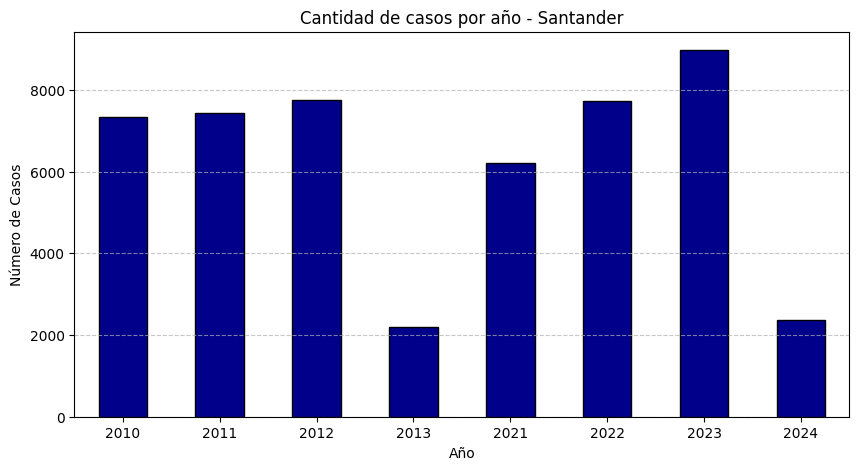

In [8]:
import matplotlib.pyplot as plt

casos_por_anio.plot(kind="bar", figsize=(10,5), color="#00008B", edgecolor="black")
plt.title("Cantidad de casos por año - Santander")
plt.xlabel("Año")
plt.ylabel("Número de Casos")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

El gráfico muestra la cantidad de casos registrados anualmente en el departamento de Santander. Se destacan las siguientes observaciones:

- Años con mayor incidencia: 2012, 2022 y 2023 presentan los valores más altos, superando los 7,500 casos.
- Caída drástica en 2013: Se observa una reducción significativa en este año, con poco más de 2,000 casos, lo que podría deberse a cambios en el registro o factores externos.
- Recuperación y fluctuaciones: A partir de 2021, los casos aumentan nuevamente, alcanzando un máximo en 2023 con más de 8,500 reportes.
- Datos incompletos en 2024: La cifra es baja en comparación con otros años, posiblemente porque el año aún no ha concluido.

genero
MASCULINO    31748
FEMENINO     18212
Name: count, dtype: int64


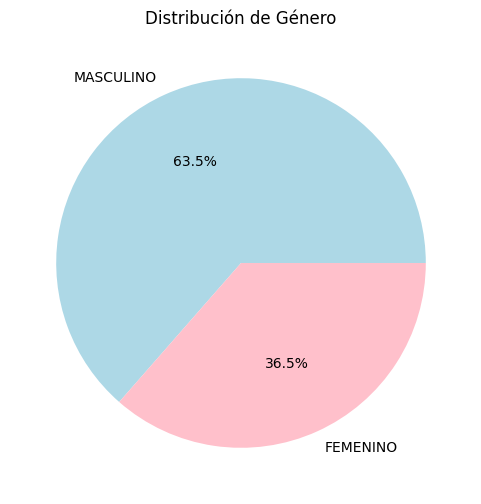

In [9]:
# Frecuencia de género
df1 = df[df['genero'].isin(['MASCULINO','FEMENINO'])]
genero_frecuencia = df1["genero"].value_counts()
print(genero_frecuencia)
# Gráfico de pastel
plt.figure(figsize=(6,6))
genero_frecuencia.plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "pink"], )
plt.title("Distribución de Género")
plt.ylabel("")
plt.show()


El gráfico de pastel muestra la distribución de los casos registrados según el género de las personas involucradas. Se destacan los siguientes puntos:

- **Predominio masculino**: El 63.5% de los casos corresponden a personas de género masculino (31,748 registros).
- **Menor incidencia en mujeres**: El 36.5% de los casos involucran a personas de género femenino (18,212 registros).
- **Diferencia significativa**: La cantidad de casos en hombres casi duplica la de mujeres, lo que sugiere que los eventos registrados afectan en mayor proporción a los hombres.

grupo_etario
ADULTOS         43208
ADOLESCENTES     4653
MENORES          1689
Name: count, dtype: int64


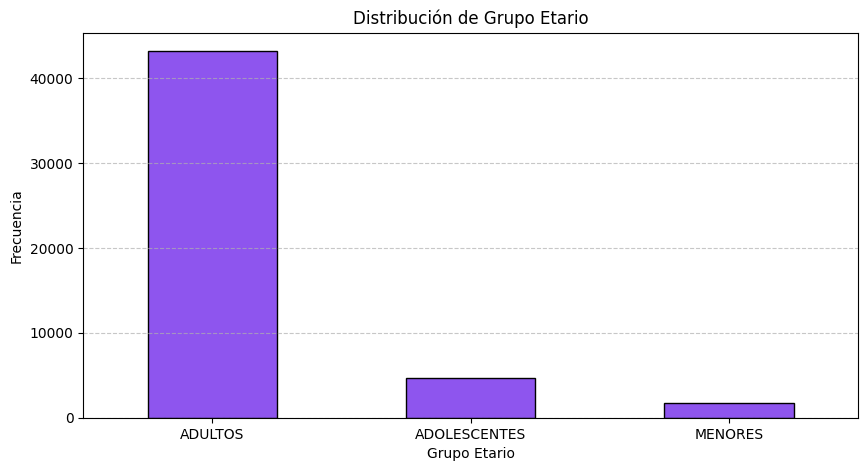

In [18]:
# Frecuencia de grupo etario
df2 = df[df['grupo_etario'].isin(['ADULTOS','ADOLESCENTES', 'MENORES'])]
grupo_etario_frecuencia = df2["grupo_etario"].value_counts()
print(grupo_etario_frecuencia)

# Gráfico de barras
plt.figure(figsize=(10,5))
grupo_etario_frecuencia.plot(kind="bar", color="#8E55EE", edgecolor="black")
plt.title("Distribución de Grupo Etario")
plt.xlabel("Grupo Etario")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


El gráfico muestra la distribución de los casos según el grupo etario, evidenciando que los *adultos* son el grupo más afectado, con **43,208** registros, representando la gran mayoría de los incidentes. En comparación, los *adolescentes* registran **4,653** casos y los *menores* solo **1,689**, lo que indica una incidencia significativamente menor en estos grupos.

Este patrón puede explicarse por la mayor exposición de los adultos a situaciones de riesgo, actividades laborales y entornos donde pueden ocurrir estos incidentes. Para entender mejor la situación, sería útil analizar la relación de estas cifras co

descripci_n_conducta
LESIONES PERSONALES                               31191
LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )    18809
Name: count, dtype: int64


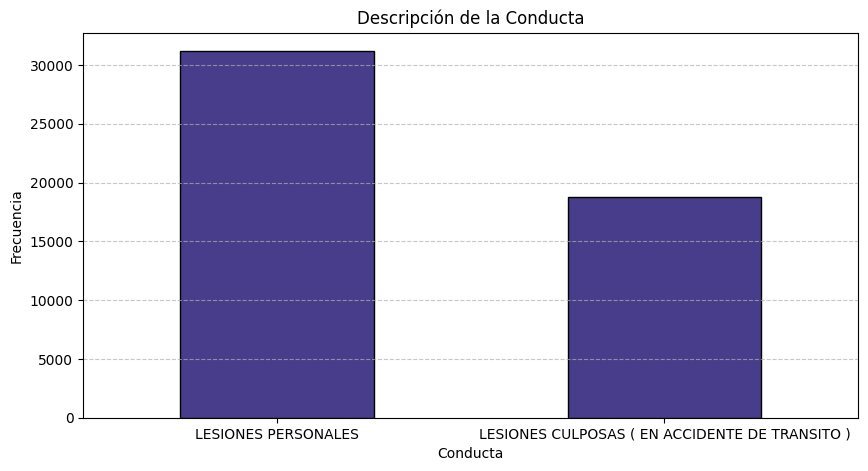

In [19]:
import matplotlib.pyplot as plt

# Frecuencia de cada tipo de conducta
conducta_frecuencia = df["descripci_n_conducta"].value_counts()
print(conducta_frecuencia)
# Gráfico de barras
plt.figure(figsize=(10,5))
conducta_frecuencia.plot(kind="bar", color="#483D8B", edgecolor="black")
plt.title("Descripción de la Conducta")
plt.xlabel("Conducta")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


El gráfico muestra la distribución de los casos según la descripción de la conducta. Se observa que las lesiones personales son las más frecuentes, con **31,191** registros, superando significativamente a las lesiones culposas en accidentes de tránsito, que alcanzan 18,809 casos. Esto sugiere que los incidentes no relacionados con el tránsito tienen una mayor incidencia. 

Las diferencias pueden deberse a factores como conflictos interpersonales, violencia urbana o agresiones físicas, mientras que las lesiones culposas podrían estar influenciadas por la densidad vehicular y las condiciones de movilidad. Un análisis más detallado podría incluir la ubicación de estos incidentes y su relación con variables como grupo etario y género.

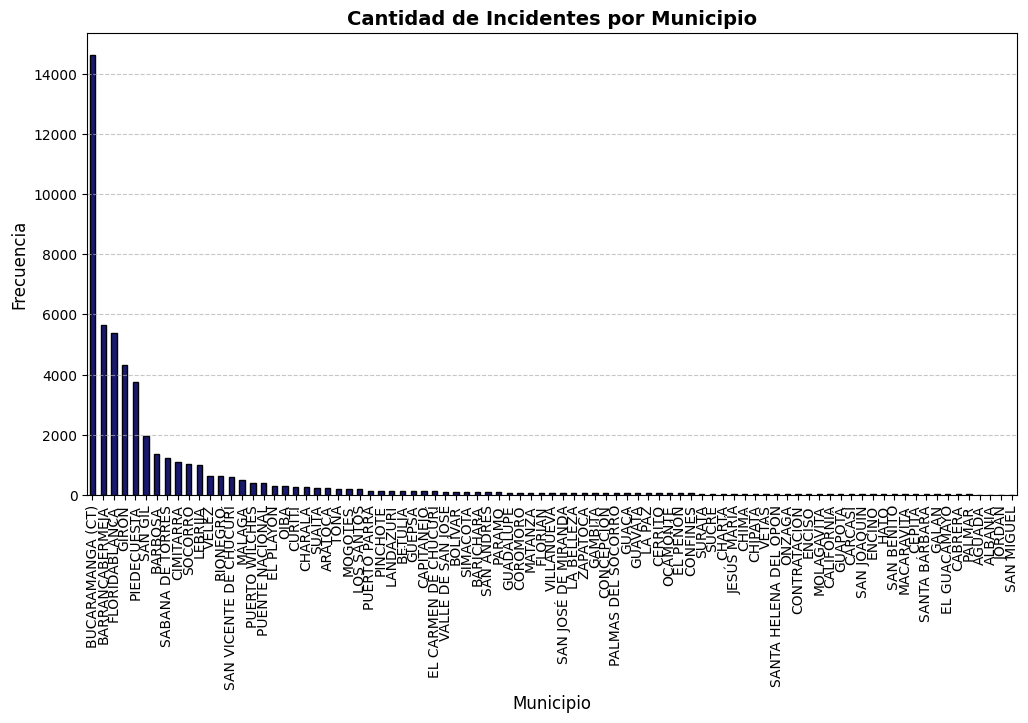

In [20]:
import matplotlib.pyplot as plt

df['municipio_1'] = df['municipio'].apply(lambda x : str(x).upper())
municipio_frecuencia = df["municipio_1"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,6))

# Graficar con barras horizontales para mejor legibilidad
municipio_frecuencia.plot(kind="bar", color="#191970", edgecolor="black")
plt.title("Cantidad de Incidentes por Municipio", fontsize=14, fontweight="bold")
plt.xlabel("Municipio", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


El gráfico muestra la cantidad de incidentes por municipio, evidenciando una alta concentración en Bucaramanga, seguida por otras ciudades como Barrancabermeja y Floridablanca. La distribución tiene una marcada desigualdad, con la mayoría de los municipios presentando una baja frecuencia de casos. Esto sugiere que los incidentes se concentran principalmente en áreas urbanas más densamente pobladas, lo que puede estar relacionado con factores como la actividad económica, movilidad y dinámicas de seguridad.

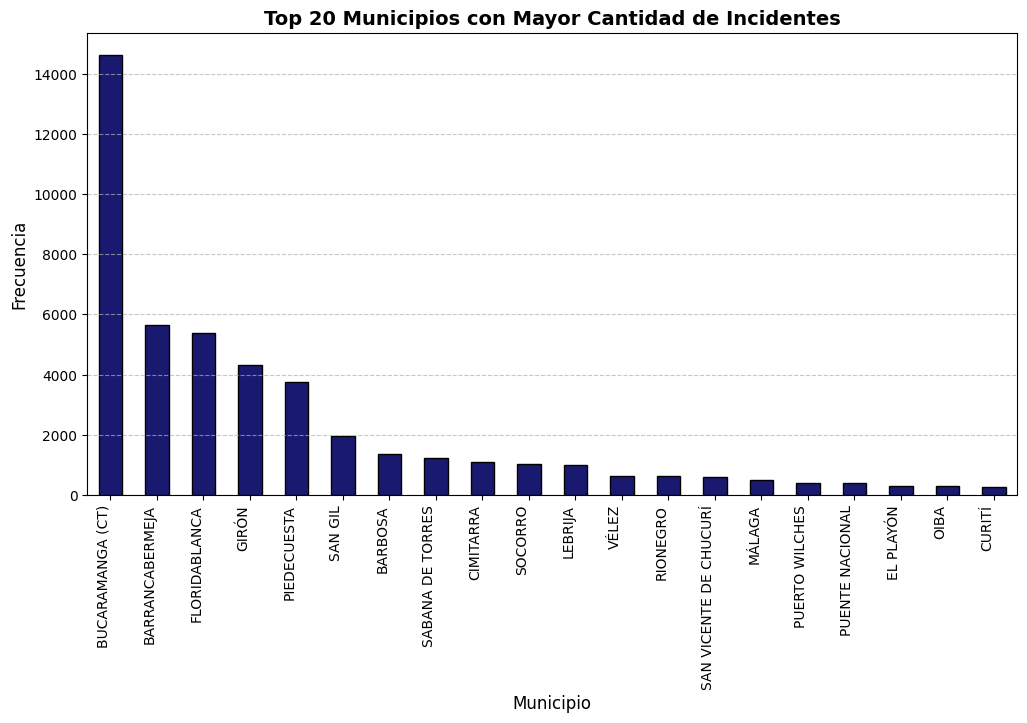

In [21]:
import matplotlib.pyplot as plt

df['municipio_1'] = df['municipio'].apply(lambda x : str(x).upper())
municipio_frecuencia_top20 = df["municipio_1"].value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))

# Graficar con barras 
municipio_frecuencia_top20.plot(kind="bar", color="#191970", edgecolor="black")
plt.title("Top 20 Municipios con Mayor Cantidad de Incidentes", fontsize=14, fontweight="bold")
plt.xlabel("Municipio", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=90, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

El gráfico muestra los 20 municipios con mayor cantidad de incidentes, destacando a Bucaramanga con una cifra significativamente superior al resto. Barrancabermeja, Floridablanca y Girón también presentan altos registros, lo que sugiere que las áreas urbanas concentran la mayoría de los casos. A medida que se desciende en la lista, la frecuencia disminuye considerablemente, indicando que en municipios más pequeños los incidentes son menos comunes.

count    50000.000000
mean         1.349220
std          0.845364
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         20.000000
Name: cantidad, dtype: float64


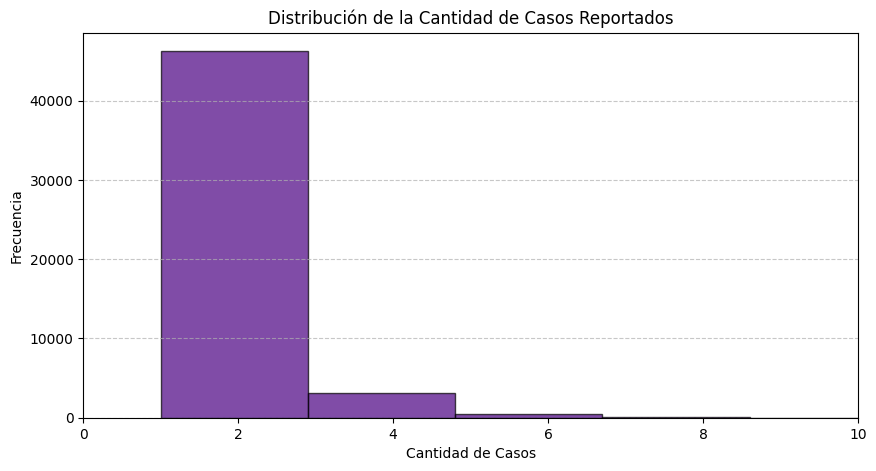

In [28]:

df["cantidad"] = pd.to_numeric(df["cantidad"], errors="coerce")
print(df["cantidad"].describe())

# Histograma de cantidad de casos
plt.figure(figsize=(10,5))
df["cantidad"].plot(kind="hist", bins=10, color="#4B0082", edgecolor="black", alpha=0.7)
plt.title("Distribución de la Cantidad de Casos Reportados")
plt.xlabel("Cantidad de Casos")
plt.xlim(0,10)
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

El histograma muestra la distribución de la cantidad de casos reportados, donde la gran mayoría de los registros tienen un valor de 1 caso por evento. Esto se confirma con la estadística descriptiva, donde la mediana (50%) y el percentil 75% tienen un valor de 1, indicando que la distribución está altamente sesgada a la derecha. Aunque el valor máximo alcanza 20 casos en un solo registro, estos son casos atípicos y poco frecuentes. La baja desviación estándar (0.84) refuerza la poca variabilidad en los datos, lo que sugiere que la mayoría de los eventos son individuales y rara vez se reportan en grandes volúmenes.

armas_medios
ALMOHADA                                  1
LICOR ADULTERADO                          1
NO REPOTADO                               1
MINA ANTIPERSONA                          1
ALUCINOGENOS                              1
BOLSA PLASTICA                            2
PAPA EXPLOSIVA                            4
PRENDAS DE VESTIR                         4
ARTEFACTO INCENDIARIO                     4
VENENO                                    4
POLVORA(FUEGOS PIROTECNICOS)              5
JERINGA                                   6
CINTAS/CINTURON                           6
SUSTANCIAS TOXICAS                        9
ARTEFACTO EXPLOSIVO/CARGA DINAMITA        9
ALIMENTOS VENCIDOS                        9
ESCOPOLAMINA                             11
GRANADA DE MANO                          12
NO RESPORTADO                            15
GASES                                    16
MEDICAMENTOS                             17
AGUA CALIENTE                            19
QUIMICOS           

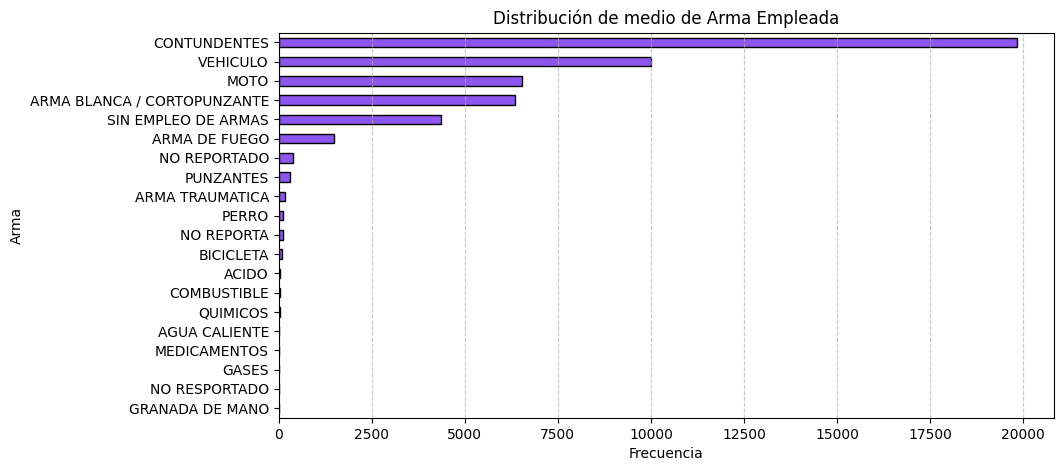

In [15]:
import matplotlib.pyplot as plt

arma_frecuencia = df["armas_medios"].value_counts().sort_values(ascending=True)
print(arma_frecuencia)
arma_top20 = df["armas_medios"].value_counts().sort_values(ascending=False).head(20)
arma_top20 = arma_top20.iloc[::-1]
 
# Gráfico de barras
plt.figure(figsize=(10, 5))
arma_top20.plot(kind="barh", color="#8E55EE", edgecolor="black")
plt.title("Distribución de medio de Arma Empleada")
plt.xlabel("Frecuencia")
plt.ylabel("Arma")
plt.xticks(rotation=0)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()
 

El gráfico muestra la distribución de los medios utilizados en los incidentes reportados. Se observa que los **objetos contundentes** son el mecanismo más común, con una frecuencia cercana a 20,000 casos, seguidos por **vehículos** y **armas blancas/cortopunzantes**, que también presentan un alto número de registros.

El uso de **armas de fuego y armas** traumáticas es significativamente menor en comparación con estos medios, mientras que otros elementos como **ácido, químicos o granadas de mano** tienen una incidencia casi nula. También se destaca que una proporción considerable de casos fueron registrados sin empleo de armas, lo que sugiere que muchos de los incidentes pueden haber ocurrido a partir de agresiones físicas sin objetos o vehículos involucrados.
